In [1]:
import open3d as o3d 
import matplotlib.pyplot as plt

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


depth image dimension: <bound method PyCapsule.dimension of Image of size 4056x3040, with 1 channels.
Use numpy.asarray to access buffer data.>


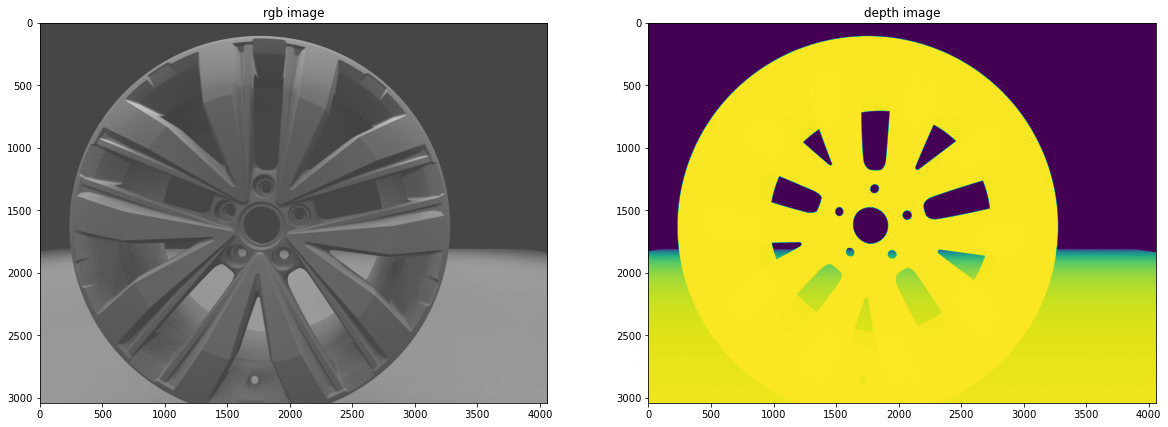

In [2]:
rgb_img_path = './renders/roda_rgb.png'
depth_img_path = './renders/roda_depth_inverted.png'

# color_raw = o3d.io.read_image('.//redwood_dataset_01882/rgb/0000001-000000000000.jpg')
# depth_raw = o3d.io.read_image('.//redwood_dataset_01882/depth/0000001-000000000000.png')


color_raw = o3d.io.read_image(rgb_img_path)
depth_raw = o3d.io.read_image(depth_img_path)

print(f'depth image dimension: {depth_raw.dimension}')

plt.figure(figsize=(20, 14))

plt.subplot(1, 2, 1)
plt.title('rgb image')
plt.imshow(color_raw)

plt.subplot(1, 2, 2)
plt.title('depth image')
plt.imshow(depth_raw)

plt.show()

RGBD img shape: <bound method PyCapsule.dimension of RGBDImage of size 
Color image : 4056x3040, with 1 channels.
Depth image : 4056x3040, with 1 channels.
Use numpy.asarray to access buffer data.>


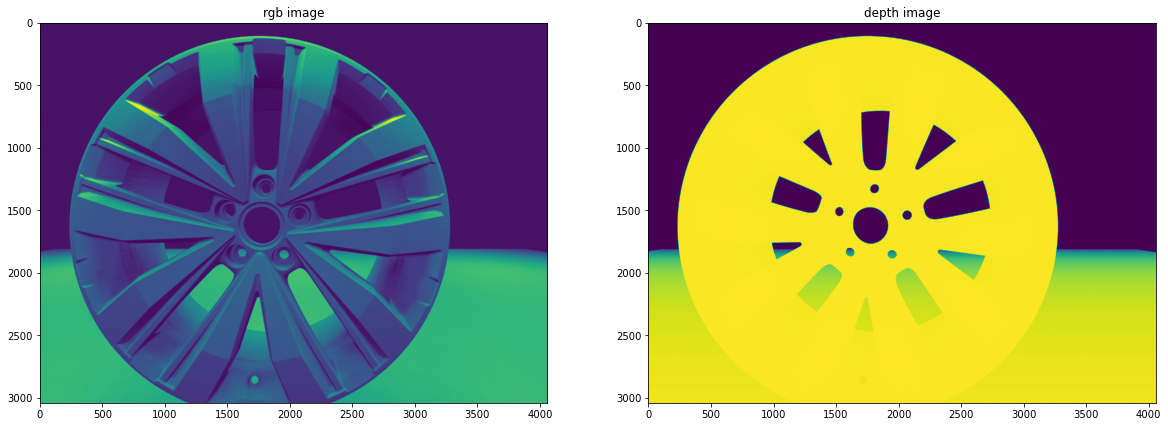

In [3]:

rgbd_image = o3d.geometry.RGBDImage.create_from_color_and_depth(
    color_raw, depth_raw)

print(f'RGBD img shape: {rgbd_image.dimension}')

plt.figure(figsize=(20, 14))
plt.subplot(1, 2, 1)
plt.title('rgb image')
plt.imshow(rgbd_image.color)

plt.subplot(1, 2, 2)
plt.title('depth image')
plt.imshow(rgbd_image.depth, cmap='viridis')
plt.show()



In [8]:
fx = 6000
fy = 6000
cx = 1920/2
cy = 1080/2

camera_matrix = [[fx, 0, cx], [0, fy, cy], [0, 0, 1]]

pcd = o3d.geometry.PointCloud.create_from_rgbd_image(rgbd_image, 
o3d.camera.PinholeCameraIntrinsic(width=1920, height=1080, fx=fx, fy=fy, cx=cx, cy=cy))

# pcd = o3d.geometry.PointCloud.create_from_rgbd_image(
#     rgbd_image, 
#     o3d.camera.PinholeCameraIntrinsic(
#         o3d.camera.PinholeCameraIntrinsicParameters.PrimeSenseDefault))


pcd.transform([[1, 0, 0, 0], 
              [0, -1, 0, 0],
              [0, 0, 1, 0], 
              [0, 0, 0, 1]])

o3d.visualization.draw_geometries([pcd])

In [5]:
print(dir(o3d.camera.PinholeCameraIntrinsicParameters))

['Kinect2ColorCameraDefault', 'Kinect2DepthCameraDefault', 'PrimeSenseDefault', '__class__', '__delattr__', '__dir__', '__doc__', '__entries', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__index__', '__init__', '__init_subclass__', '__int__', '__le__', '__lt__', '__members__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setstate__', '__sizeof__', '__str__', '__subclasshook__', 'name', 'value']


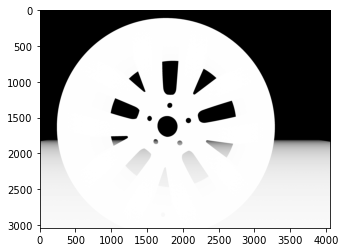

In [6]:
# com opencv + numpy 

import cv2 as cv
import numpy as np

rgb = cv.imread(rgb_img_path)
depth = cv.imread(depth_img_path)

plt.imshow(depth[:,:,0], cmap='gray')
plt.show()